# Data Exploration
In this notebook, I'm doing some basic exploration of the csv and image data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The training data has 13 columns. 11 of them are the binary target variables. We also have the 'StudyInstanceUID' which identifies the corresponding image. And lastly the PatientID indicates which rows came from the same patient, and so could be correlated.

In [2]:
filename = 'data/train.csv'
df = pd.read_csv(filename)
df.head()

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1


Fortunately, the tabular data is very clean. There are no missing values for images, ids or binary labels.

In [3]:
df.isna().sum()

StudyInstanceUID              0
ETT - Abnormal                0
ETT - Borderline              0
ETT - Normal                  0
NGT - Abnormal                0
NGT - Borderline              0
NGT - Incompletely Imaged     0
NGT - Normal                  0
CVC - Abnormal                0
CVC - Borderline              0
CVC - Normal                  0
Swan Ganz Catheter Present    0
PatientID                     0
dtype: int64

In [4]:
df.describe()

,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present
count,30083.000000,30083.000000,30083.000000,30083.000000,30083.000000,30083.000000,30083.000000,30083.000000,30083.000000,30083.000000,30083.000000
mean,0.002626,0.037829,0.240667,0.009274,0.017585,0.091347,0.159459,0.106206,0.281222,0.708839,0.027590
std,0.051179,0.190785,0.427496,0.095857,0.131438,0.288107,0.366110,0.308106,0.449603,0.454305,0.163799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Most PatientIDs appear more than once in the training data, up to 172 times. There are 3255 distinct patients, with an average of 9.24 scans per patient.

In [5]:
df.PatientID.value_counts().describe()

count    3255.000000
mean        9.242089
std        12.624028
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max       172.000000
Name: PatientID, dtype: float64

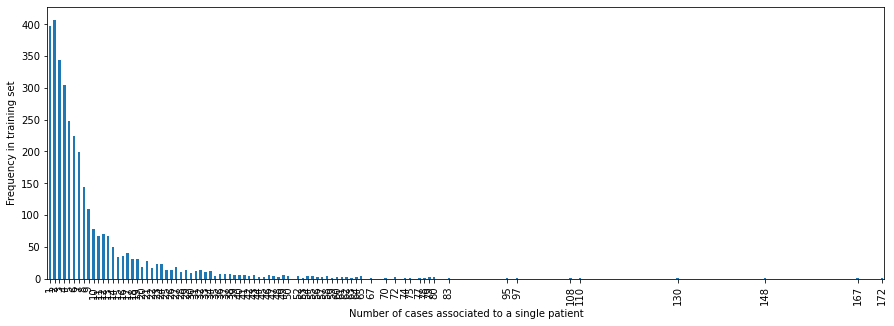

In [6]:
ax = df.PatientID.value_counts().value_counts().sort_index().plot(kind='bar',figsize=(15,5))
ax.set_xlabel('Number of cases associated to a single patient');
ax.set_ylabel('Frequency in training set');

The binary labels can be grouped based on the type of catheter, but for any given patient there might be zero, one, or more labels in a given class. More than one label of a given type is rare however, and might correspond to multiple catheters of the same type present. But in any case, the labels are highly correlated, which might be important to account for.

In [7]:
for prefix in ['ETT','NGT','CVC']:
    how_many_classes = df[[s for s in list(df) if s[:3]==prefix]].sum(axis=1)
    print(prefix)
    print(how_many_classes.value_counts().sort_index())
    print()

ETT
0    21626
1     8457
dtype: int64

NGT
0    21775
1     8263
2       45
dtype: int64

CVC
0      750
1    25758
2     3504
3       71
dtype: int64



In [18]:
multilabel_counts = df.select_dtypes(exclude=['object']).value_counts().values

In [21]:
multilabel_counts

array([12763,  4038,  1678,  1428,   973,   952,   822,   492,   470,
         403,   331,   298,   297,   254,   223,   209,   196,   174,
         173,   165,   162,   157,   153,   133,   132,   127,   118,
         107,   101,    97,    95,    91,    90,    80,    78,    76,
          76,    69,    63,    62,    60,    54,    51,    48,    47,
          44,    43,    42,    42,    40,    36,    36,    36,    35,
          35,    34,    32,    31,    29,    27,    24,    24,    24,
          23,    22,    21,    21,    21,    18,    18,    18,    17,
          17,    15,    15,    15,    14,    13,    13,    13,    12,
          12,    12,    12,    12,    11,    11,    11,    11,    10,
          10,    10,    10,     9,     9,     8,     8,     8,     8,
           8,     8,     8,     7,     7,     7,     7,     7,     7,
           7,     7,     7,     6,     6,     6,     6,     5,     5,
           5,     5,     5,     5,     5,     5,     5,     5,     4,
           4,     4,

In [19]:
multilabel_counts.shape

(211,)

In [20]:
(multilabel_counts > 100).sum()

29

In [2]:
filename = 'data/train_annotations.csv'
df = pd.read_csv(filename)
df.head()

,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


In [22]:
def parse_list(s):
    s = s[2:-2]
    s = s.split('], [')
    as_list = [[int(u) for u in t.split(', ')] for t in s]
    return np.transpose(as_list)

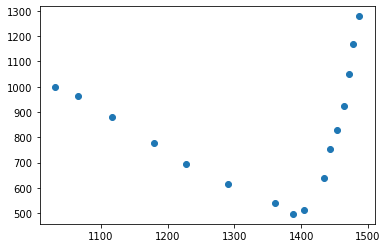

In [25]:
x,y = parse_list(df.data.iloc[0])
plt.scatter(x,y)

In [26]:
df.shape

(17999, 3)